## Exploratory Data Anaylsis
Roles to Explore:


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast

#Loading dataset
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Changing job_posted_date to date time format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\jakey\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Filter for US Data Analyst roles

In [3]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]


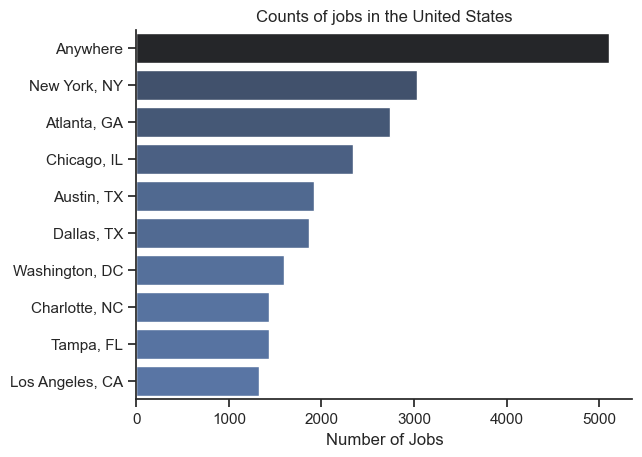

In [4]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x ='count', y= 'job_location', hue = 'count',palette='dark:b_r', legend=  False)
sns.despine()
plt.title('Counts of jobs in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Job Opportunities:

<function matplotlib.pyplot.show(close=None, block=None)>

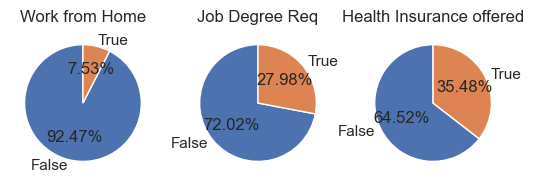

In [9]:
fig, ax = plt.subplots(1, 3)
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance offered'
}

for  i,(column, title) in enumerate(dict_column.items()):
    
    ax[i].pie(df_da_us[column].value_counts(),startangle = 90, autopct = '%1.2f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show

#### Companies to Explore:

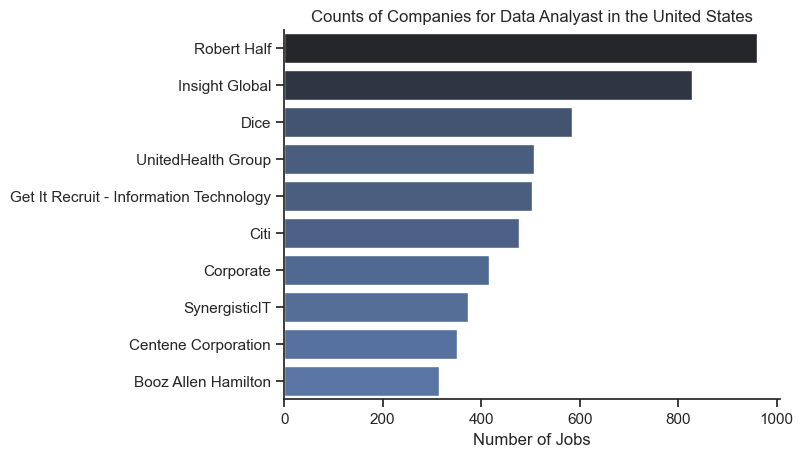

In [21]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x ='count', y= 'company_name', hue = 'count',palette='dark:b_r', legend=  False)
sns.despine()
plt.title('Counts of Companies for Data Analyast in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()